In [158]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)


## Question 3

In [ ]:
ipo_df = pd.read_csv('data/hw3_dataset.txt', header = None,delim_whitespace=True, 
            names = ['Identification number', 'Venture capital funding',
                    'Face value of company', 'Number of shares offered',
                                                    'Leveraged buyout'])

In [3]:
ipo_df = ipo_df.set_index('Identification number')

## Checking the balance of the predictors

In [4]:
len(ipo_df.loc[ipo_df['Venture capital funding'] == 1])/ len(ipo_df)

0.43983402489626555

## Split to train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ipo_df[ipo_df.columns[1:4]], ipo_df[[ipo_df.columns[0]]], test_size=0.33)

In [6]:
X_train

,Face value of company,Number of shares offered,Leveraged buyout
Identification number,,,
220,17500000,1400000,0
95,7500000,3000000,0
18,3575000,1100000,0
473,117000000,6000000,0
441,55400000,5540000,0
114,9375000,1500000,1
388,37500000,2500000,0
63,5750000,1150000,0
447,59400000,3300000,0


## Scaling so a constant lambda can be set across all features

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train.loc[:,:] = scaler.transform(X_train)
scaler.fit(X_test)
X_test.loc[:,:] = scaler.transform(X_test)


#y_train.loc = scaler.transform(y_train)

In [9]:
X_train

,Face value of company,Number of shares offered,Leveraged buyout
Identification number,,,
220,-0.342,-0.570,-0.309
95,-0.697,0.492,-0.309
18,-0.836,-0.769,-0.309
473,3.186,2.485,-0.309
441,1.002,2.179,-0.309
114,-0.630,-0.504,3.240
388,0.367,0.160,-0.309
63,-0.759,-0.736,-0.309
447,1.144,0.692,-0.309


## Naive Bayes Implementation

In [47]:
def naive_bayes(X_train, Y_train, X_test, Y_test, lamb):
    
    prior_1 = np.sum(Y_train, axis = 0)/len(X_train)
    prior_0 = 1 - prior_1
    
    post_0 = np.zeros(len(X_test))
    post_1 = np.zeros(len(X_test))
    
    pred = np.zeros(len(X_test))
    
    
    for i in Y_test.index:
        
        for j in Y_train.index:
            
            if Y_train.loc[j]['Venture capital funding'] == 1:
                
                delta                                = (X_test.loc[i] - X_train.loc[j]) / lamb
                post_1[list(X_test.index).index(i)] = post_1[list(X_test.index).index(i)] \
                                                        + 1/((lamb * len(Y_train))\
                                                        * stats.norm.cdf(np.dot(delta, delta))) 
                
            if Y_train.loc[j]['Venture capital funding'] == 0:
                
                delta                               = (X_test.loc[i] - X_train.loc[j])
                post_0[list(X_test.index).index(i)] = post_0[list(X_test.index).index(i)] \
                                                        + 1/((lamb * len(Y_train))\
                                                        * stats.norm.cdf(np.dot(delta, delta))) 
        
        post_1[list(X_test.index).index(i)] = post_1[list(X_test.index).index(i)] * prior_1
        post_0[list(X_test.index).index(i)] = post_0[list(X_test.index).index(i)] * prior_0


    
    for i in range(len(post_1)):

        if post_1[i] > post_0[i]: 

            pred[i] = 1


        
        
    accuracy = 1 - sum(abs(list(Y_test['Venture capital funding']) - pred))/len(Y_test)
    
    
    return prior_1, prior_0, post_1, post_0, pred


In [430]:
accuracies = []

for lamb in np.linspace(2.8,5, 10):
    
    accuracies.append(naive_bayes(X_train, y_train, X_test, y_test, lamb))

In [41]:
accuracies

[0.5625,
 0.5625,
 0.5625,
 0.58125,
 0.58125,
 0.5875,
 0.5875,
 0.5875,
 0.59375,
 0.58125]

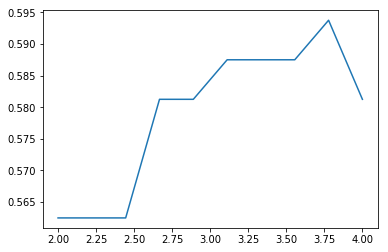

In [42]:
plt.plot(np.linspace(2,4, 10),accuracies)

## Lambda of 3.75 appears to work the best

In [48]:
prior_1, prior_0, post_1, post_0, pre = naive_bayes(X_train, y_train, X_test, y_test, 3.75)

In [50]:
1 - sum(abs(list(y_test['Venture capital funding']) - pre))/len(y_test)

0.58125

In [51]:
tn, fp, fn, tp = confusion_matrix(pre, list(y_test['Venture capital funding'])).ravel()

In [52]:
(tn, fp, fn, tp)

(83, 60, 7, 10)

## Question 4

In [65]:
diseases = pd.read_csv("data/us_diseases.csv")
del diseases['Unnamed: 0']
diseases = diseases[(diseases.disease == 'Measles') & (diseases.state == 'California')]
diseases

,disease,state,year,weeks_reporting,count,population
2650,Measles,California,1928,52,3698,5230775.000
2651,Measles,California,1929,52,4024,5465979.000
2652,Measles,California,1930,52,43416,5677251.000
2653,Measles,California,1931,52,27807,5856343.000
2654,Measles,California,1932,52,12618,6004994.000
2655,Measles,California,1933,52,26551,6128552.000
2656,Measles,California,1934,52,25650,6233386.000
2657,Measles,California,1935,52,28799,6326636.000
2658,Measles,California,1936,50,49050,6416022.000
2659,Measles,California,1937,51,5107,6509758.000


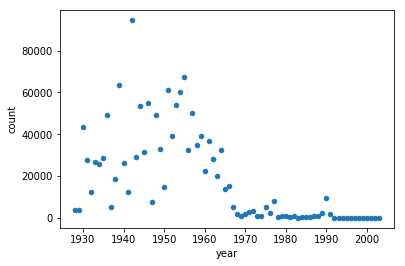

In [73]:
diseases[['year','count']].plot.scatter('year','count')

In [78]:
def gradientDescent(x, y, alpha, m, numIterations):
   
    theta = np.ones(2)
   
    for i in range(0, numIterations):
        
        loss     = (1 / (1 + np.exp(-(1 + (np.dot(x, theta)))))) - y 
        gradient = np.dot(x.transpose(), loss) / m
        theta    = theta - alpha * gradient
         
    return theta

In [413]:
def get_local_pred(x, y, tau):
 
    m             = len(x)
    y_hat         = np.zeros(m)
    numIterations = 5000
    alpha         = .01
    
    x             = x.astype('float')
    w             = np.array([np.exp(-(x-x[i])**2/(2*tau)) for i in range(m)])     
    
    for i in range(m):
        
        weights  = w[:, i]      
        b        = np.array([np.sum(weights * y), np.sum(weights * y * x)]) 
        A        = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])      
        
        
        theta    = gradientDescent(A, b, alpha, m , numIterations)       
        y_hat[i] = theta[0] + theta[1] * x[i] 

    return y_hat

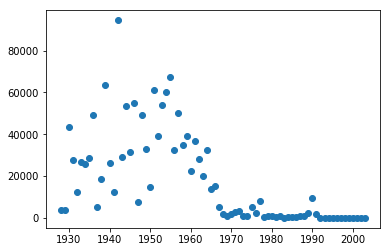

In [375]:
plt.scatter(diseases['year'], diseases['count'])

In [431]:
scaler = MinMaxScaler()
x      = scaler.fit_transform(diseases['year'].reshape(-1, 1))
y      = scaler.fit_transform(diseases['count'].reshape(-1, 1))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


## With Inverse Scaling and lambda as 0.005 and 0.01

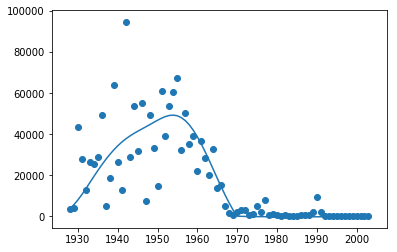

In [429]:
plt.plot(diseases['year'], scaler.inverse_transform(get_local_pred(x, y, 0.005).reshape(-1, 1)))
plt.scatter(diseases['year'], scaler.inverse_transform(y), label='y')

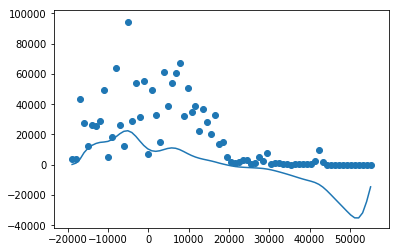

In [301]:
plt.plot(scaler.inverse_transform(x), scaler.inverse_transform(get_local_pred(x, y, 0.01).reshape(-1, 1)))
plt.scatter(scaler.inverse_transform(x), scaler.inverse_transform(y), label='y')

## Without Inverse Scaling and lambda as 0.00000005 and 0.009

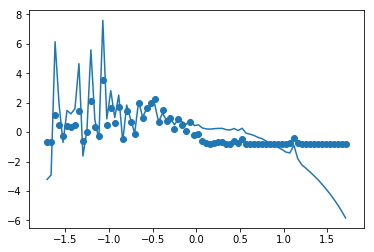

In [304]:
plt.plot(x, get_local_pred(x, y, 0.00000005))
plt.scatter(x, y, label='y')

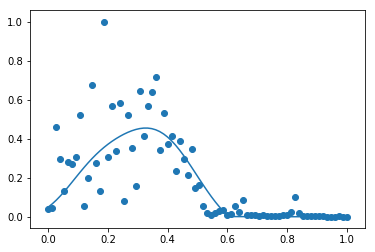

In [427]:
plt.plot(x, get_local_pred(x, y, 0.009))
plt.scatter(x, y, label='y')

## Describe the role of the tuning parameter λ.

The higher the lambda, the more number of points the regression smoothes over. The lower the lamda, the more 'local' the regression is going to be.


## What conclusion regarding the occurrence of the disease can you make from the local regression fit? 

The number of people with measles initially increased from 1930's to 1960's and then decreased over the years from a peak of around 50k to close to 0. 


## Can you suggest an explanation for this pattern?

This makes obvious sense as technology in healthcare and vaccines have advanced and measles has largly been eradicated.